# Hermite Polynomials

These are a set of polynomials $H_n$ on the real line, orthogonal over the interval $[-\infty, \infty]$.

Physicists tend to encounter them in the eigenfunctions of the quantum harmonic oscillator:

$$ \psi_n(x) = \frac{1}{\sqrt{2^n\,n!}} \cdot \left(\frac{m\omega}{\pi \hbar}\right)^{1/4} \cdot e^{
- \frac{m\omega x^2}{2 \hbar}} \cdot H_n\left(\sqrt{\frac{m\omega}{\hbar}} x \right), \qquad n = 0,1,2,\ldots $$

They are also important in probability and statistics. There is disagreement about scaling the functions: physicists use a leading term of $2^n$ and this seems to be what Python libraries deliver. In probability a leading term of 1 is preferred.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

Python implements these functions in a variety of ways (see the Legendre function notebook for fuller details). The two simplest are:

- `scipy.special.hermite()` for numerical work and plotting
- `sympy.functions.special.polynomials.hermite()` for symbolic math

### scipy.special

Calling `hermite(n)` returns the nth-order polynomial as a function which can then itself be called with one or more x-values.

In [5]:
import scipy.special as sp
H_3_sp = sp.hermite(3)
display(H_3_sp)

poly1d([  8.,   0., -12.,   0.])

In [6]:
x10 = np.linspace(-1, 1, 10)
display(H_3_sp(x10))

array([ 4.        ,  5.56927298,  5.29492455,  3.7037037 ,  1.3223594 ,
       -1.3223594 , -3.7037037 , -5.29492455, -5.56927298, -4.        ])

## sympy.functions.special.polynomials

This is symbolic math, which will give you differentiation, integration, etc, as well as nice $LaTeX$ output. Not so convenient for plotting.

In [17]:
from IPython.display import Math
from sympy import latex, hermite
from sympy.abc import x

for i in range(10):
    l_i = latex(hermite(i, x))
    display(Math('H_{} = {}'.format(i, l_i)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note that the coefficients rapidly get large.

When __plotting__ the first few Hermite polymomials over a limited range it is clear that these are very different curves, so scaling the y-axis is a problem.

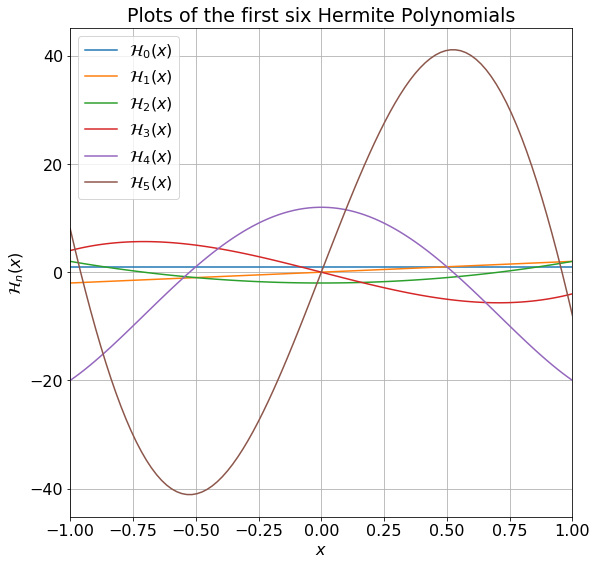

In [18]:
import scipy.special as sp

xlims = (-1, 1)
x = np.linspace(xlims[0], xlims[1], 100)

plt.figure(figsize=(9, 9))
for v in range(0, 6):
    plt.plot(x, sp.hermite(v)(x))

plt.xlim(xlims)
# plt.ylim((-1.1, 1.1))
plt.legend(('$\mathcal{H}_0(x)$', '$\mathcal{H}_1(x)$', '$\mathcal{H}_2(x)$',
           '$\mathcal{H}_3(x)$', '$\mathcal{H}_4(x)$', '$\mathcal{H}_5(x)$'),
           loc = 0)
plt.xlabel('$x$')
plt.ylabel('$\mathcal{H}_n(x)$')
plt.title('Plots of the first six Hermite Polynomials')                                
plt.grid(True)

## References:
    
- Boas, "Mathematical methods in the physical sciences", 3rd ed, section 12.22
- MathWorld, http://mathworld.wolfram.com/HermitePolynomial.html
- Wikipedia, https://en.wikipedia.org/wiki/Hermite_polynomials
- Griffiths & Schroeter, "Introduction to Quantum Mechanics", 3rd ed, section 2.3.2